In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.utils import plot_model
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
stock = input()
end_date = datetime.now()
start_date = end_date - timedelta(days=10 * 365)
df = yf.download(stock, start=start_date, end=end_date-timedelta(1))
print(df)

AAPL
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2013-07-22   15.337857   15.348214   15.195357   15.225357   13.218610  \
2013-07-23   15.214286   15.248571   14.953929   14.963929   12.991639   
2013-07-24   15.676071   15.878214   15.545000   15.732500   13.658911   
2013-07-25   15.739286   15.764286   15.564643   15.660714   13.596587   
2013-07-26   15.546429   15.751429   15.512143   15.749643   13.673792   
...                ...         ...         ...         ...         ...   
2023-07-12  189.679993  191.699997  188.470001  189.770004  189.770004   
2023-07-13  190.500000  191.190002  189.779999  190.539993  190.539993   
2023-07-14  190.229996  191.179993  189.630005  190.690002  190.690002   
2023-07-17  191.899994  194.320007  191.809998  193.990005  193.990005   
2023-07-18  193.350006  194.330002  19

In [4]:
print("Dataframe Shape:", df.shape)
print("Null Value Present:", df.isnull().values.any())

Dataframe Shape: (2515, 6)
Null Value Present: False


<Axes: xlabel='Date'>

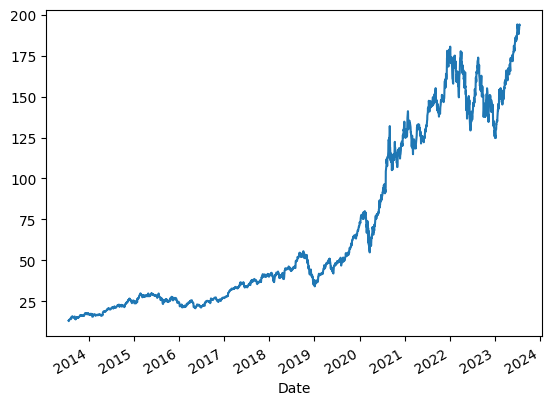

In [5]:
df['Adj Close'].plot()

In [6]:
output_var = pd.DataFrame(df['Adj Close'])
features = ['Open']

In [7]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(data=feature_transform, columns=features, index=df.index)
feature_transform.head()

,Open
Date,
2013-07-22,0.000692
2013-07-23,0.000000
2013-07-24,0.002586
2013-07-25,0.002940
2013-07-26,0.001860


In [8]:
X_train = feature_transform.values
y_train = output_var.values.ravel()

In [9]:
trainX =np.array(X_train)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])

In [10]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
315/315 [==============================] - 6s 6ms/step - loss: 6748.1357
Epoch 2/100
315/315 [==============================] - 4s 11ms/step - loss: 5767.2354
Epoch 3/100
315/315 [==============================] - 4s 12ms/step - loss: 4922.7236
Epoch 4/100
315/315 [==============================] - 4s 13ms/step - loss: 4246.7227
Epoch 5/100
315/315 [==============================] - 4s 12ms/step - loss: 3736.6150
Epoch 6/100
315/315 [==============================] - 4s 11ms/step - loss: 3359.9209
Epoch 7/100
315/315 [==============================] - 5s 15ms/step - loss: 3082.4878
Epoch 8/100
315/315 [==============================] - 5s 15ms/step - loss: 2875.5574
Epoch 9/100
315/315 [==============================] - 5s 15ms/step - loss: 2715.6526
Epoch 10/100
315/315 [==============================] - 4s 14ms/step - loss: 2582.4446
Epoch 11/100
315/315 [==============================] - 4s 14ms/step - loss: 2455.8687
Epoch 12/100
315/315 [==============================]

315/315 [==============================] - 2s 5ms/step - loss: 3.3343
Epoch 98/100
315/315 [==============================] - 1s 5ms/step - loss: 3.2831
Epoch 99/100
315/315 [==============================] - 2s 5ms/step - loss: 3.2343
Epoch 100/100
315/315 [==============================] - 2s 7ms/step - loss: 3.1876


In [12]:
model_filename = f'{stock}_model.keras'
lstm.save(model_filename)
joblib.dump(scaler, f'{stock}_scaler.joblib')

['AAPL_scaler.joblib']

In [16]:
openp = float(input())
scaledopenp = scaler.fit_transform([[openp]])
scaledopenp = scaledopenp.reshape(1, 1, scaledopenp.shape[1])
expectedclosep = lstm.predict(scaledopenp)
expectedclosep = scaler.inverse_transform(expectedclosep)
print("Expected Close Price:", expectedclosep[0, 0])

150
1/1 [==============================] - 0s 22ms/step
Expected Close Price: 162.41373
